In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

X_train=pd.read_csv("X_train_N1UvY30.csv")
X_train.head(140)
X_test=pd.read_csv("X_test_m4HAPAP.csv")
X_test.head()

<ipython-input-2-53f78d629e67>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train=pd.read_csv("X_train_N1UvY30.csv")
<ipython-input-2-53f78d629e67>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  X_test=pd.read_csv("X_test_m4HAPAP.csv")


,obs_id,venue,order_id,action,side,price,bid,ask,bid_size,ask_size,trade,flux
0,0,4,0,A,A,0.15,0.0,0.15,511.0,100.0,False,100.0
1,0,2,1,D,A,0.16,0.0,0.15,511.0,100.0,False,-100.0
2,0,4,2,D,A,1.63,0.0,0.15,511.0,100.0,False,-100.0
3,0,4,3,A,A,1.62,0.0,0.15,511.0,100.0,False,100.0
4,0,2,4,A,A,0.15,0.0,0.15,511.0,200.0,False,100.0


In [ ]:
Y_train=pd.read_csv("y_train_or6m3Ta.csv")
Y_train.head(20)

,obs_id,eqt_code_cat
0,0,10
1,1,15
2,2,0
3,3,13
4,4,0
5,5,11
6,6,15
7,7,7
8,8,23
9,9,19


In [ ]:
Sub_rand=pd.read_csv("y_random_cfm.csv")
Sub_rand.head(20)

,obs_id,eqt_code_cat
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


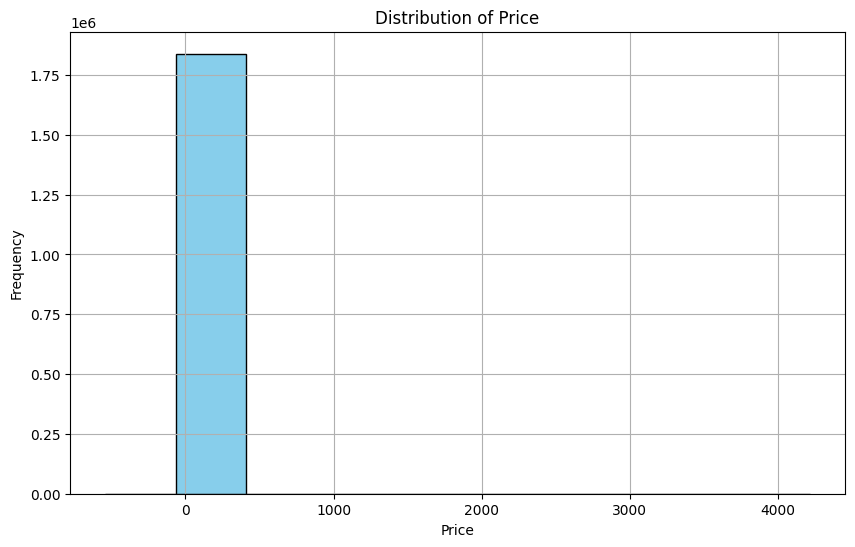

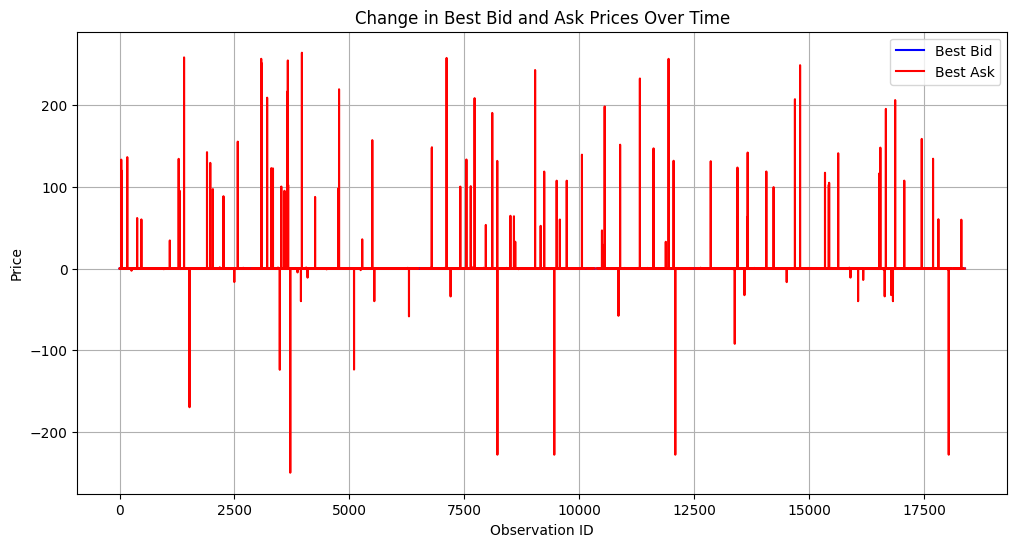

In [ ]:
# Visualize the distribution of 'price' attribute
plt.figure(figsize=(10, 6))
plt.hist(X_train['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the change in bid and ask prices over time
plt.figure(figsize=(12, 6))
plt.plot(X_train['obs_id'], X_train['bid'], label='Best Bid', color='blue')
plt.plot(X_train['obs_id'], X_train['ask'], label='Best Ask', color='red')
plt.title('Change in Best Bid and Ask Prices Over Time')
plt.xlabel('Observation ID')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Chargement des données
# Supposons que vous avez déjà chargé vos données dans un DataFrame appelé df

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Vérification des premières lignes des données
print(X_train.head())

# Gestion des données manquantes
print("Nombre de valeurs manquantes par colonne :")
print(X_train.isnull().sum())

# Remplacement des valeurs manquantes (exemple)
X_train.fillna(0, inplace=True)

# Encodage des variables catégorielles (exemple)
# Pour 'venue' et 'action'
le = LabelEncoder()
X_train['venue_encoded'] = le.fit_transform(X_train['venue'])
X_train['action_encoded'] = le.fit_transform(X_train['action'])

# Normalisation ou mise à l'échelle des données (exemple)
scaler = StandardScaler()
X_train[['price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux']] = scaler.fit_transform(X_train[['price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux']])

# Séparation des fonctionnalités et de la cible



# Fractionnement des ensembles de données en ensembles d'entraînement et de test
# Notez que nous n'avons pas de données de validation séparées, donc nous allons utiliser train_test_split pour diviser les données en train et test
y_train, y_test = train_test_split(Y_train, test_size=0.2, random_state=42)

# Affichage des tailles des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])

   obs_id  venue  order_id action side  price  bid   ask  bid_size  ask_size  \
0       0      4         0      A    A   0.30  0.0  0.01     100.0       1.0   
1       0      4         1      A    B  -0.17  0.0  0.01     100.0       1.0   
2       0      4         2      D    A   0.28  0.0  0.01     100.0       1.0   
3       0      4         3      A    A   0.30  0.0  0.01     100.0       1.0   
4       0      4         4      D    A   0.37  0.0  0.01     100.0       1.0   

   trade   flux  
0  False  100.0  
1  False  100.0  
2  False -100.0  
3  False  100.0  
4  False -100.0  
Nombre de valeurs manquantes par colonne :
obs_id      0
venue       0
order_id    0
action      0
side        0
price       0
bid         0
ask         1
bid_size    1
ask_size    1
trade       1
flux        1
dtype: int64
Taille de l'ensemble d'entraînement : 8870735
Taille de l'ensemble de test : 5115839


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Déterminer la forme de l'entrée (input_shape)
input_shape = (X_train.shape[1],)  # Nombre de colonnes de X_train

# Déterminer le nombre de classes (num_classes)
num_classes = len(y_train["eqt_code_cat"].unique())  # Nombre de classes dans y_train

# Construire le modèle
model = build_model(input_shape, num_classes)

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher un résumé du modèle
model.summary()

NameError: name 'y_train' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# Copy X_train to preserve the original data
X_train_encoded = X_train.copy()

# One-hot encode categorical features (e.g., 'venue' and 'action')
cat_cols = ['venue', 'action']  # Update with the actual categorical columns in your data
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop first category to avoid multicollinearity
encoded_cols = pd.DataFrame(encoder.fit_transform(X_train_encoded[cat_cols]))
# Manually generate feature names for the encoded categories
encoded_feature_names = encoder.get_feature_names_out(cat_cols)
encoded_cols.columns = encoded_feature_names
X_train_encoded = pd.concat([X_train_encoded.drop(columns=cat_cols), encoded_cols], axis=1)

# Perform clustering with KMeans
kmeans = KMeans(n_clusters=24, random_state=42)
kmeans.fit(X_train_encoded)

# Get cluster labels for X_train
cluster_labels_train = kmeans.labels_

# Assess the quality of clustering (if ground truth labels are available)
accuracy = accuracy_score(y_train, cluster_labels_train)
print("Accuracy of K-Means clustering on training data:", accuracy)

ValueError: could not convert string to float: 'A'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

# Prétraitement des colonnes catégorielles et numériques
categorical_cols = ['venue', 'action']
numerical_cols = ['price', 'bid', 'ask', 'bid_size', 'ask_size', 'flux']

# Création d'un preprocessor pour gérer les colonnes catégorielles et numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Définition du pipeline pour la régression logistique
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])




# Sélectionnez une seule colonne comme variable cible
y_train_single = Y_train['eqt_code_cat']  # Remplacez 'eqt_code_cat' par le nom de votre colonne cible

# Entraînement du modèle logistique
logistic_pipeline.fit(X_train, y_train_single)

# Combinaison des prédictions
logistic_pred = logistic_pipeline.predict(X_test)



# Évaluation du modèle mixte
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Accuracy of mixed model:", logistic_accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [8870735, 160800]